# Review Distribusi Probabilitas

Distribusi probabilitas adalah konsep fundamental dalam statistika dan machine learning yang menggambarkan kemungkinan terjadinya berbagai hasil dalam suatu eksperimen acak.

## Jenis-jenis Distribusi Probabilitas

### 1. Distribusi Diskrit
- Distribusi Bernoulli
- Distribusi Binomial
- Distribusi Poisson
- Distribusi Geometrik

### 2. Distribusi Kontinu
- Distribusi Normal (Gaussian)
- Distribusi Uniform
- Distribusi Eksponensial
- Distribusi Beta

## Konsep Dasar

1. **Fungsi Massa Probabilitas (PMF)**
   - Untuk variabel diskrit
   - \( P(X = x) \) adalah probabilitas X tepat sama dengan x

2. **Fungsi Densitas Probabilitas (PDF)**
   - Untuk variabel kontinu
   - \( f(x) \) adalah densitas probabilitas di titik x
   - \( P(a \leq X \leq b) = \int_a^b f(x)dx \)

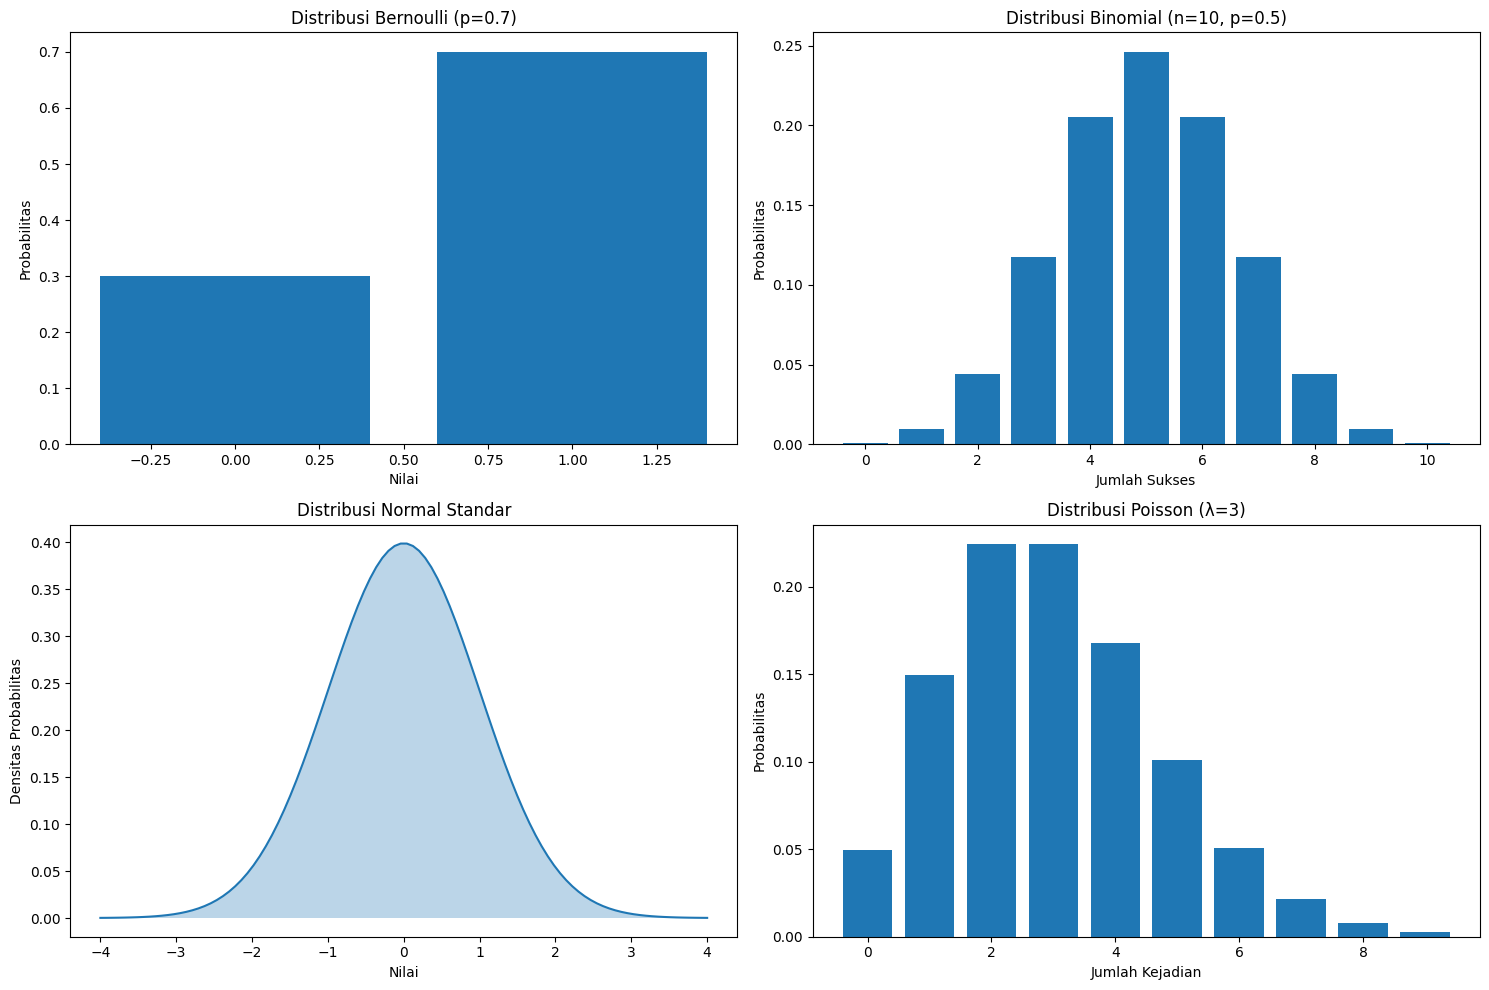

Contoh nilai probabilitas:
P(X=1) untuk Bernoulli(0.7) = 0.7000
P(X=5) untuk Binomial(10,0.5) = 0.2461
P(X=2) untuk Poisson(3) = 0.2240
P(-1 ≤ X ≤ 1) untuk Normal(0,1) = 0.6827


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Create figure
plt.figure(figsize=(15, 10))

# 1. Distribusi Bernoulli
p = 0.7
x_bernoulli = np.array([0, 1])
p_bernoulli = np.array([1-p, p])

plt.subplot(221)
plt.bar(x_bernoulli, p_bernoulli)
plt.title('Distribusi Bernoulli (p=0.7)')
plt.xlabel('Nilai')
plt.ylabel('Probabilitas')

# 2. Distribusi Binomial
n, p = 10, 0.5
x_binomial = np.arange(0, n+1)
p_binomial = stats.binom.pmf(x_binomial, n, p)

plt.subplot(222)
plt.bar(x_binomial, p_binomial)
plt.title(f'Distribusi Binomial (n={n}, p={p})')
plt.xlabel('Jumlah Sukses')
plt.ylabel('Probabilitas')

# 3. Distribusi Normal
x_normal = np.linspace(-4, 4, 100)
p_normal = stats.norm.pdf(x_normal, 0, 1)

plt.subplot(223)
plt.plot(x_normal, p_normal)
plt.fill_between(x_normal, p_normal, alpha=0.3)
plt.title('Distribusi Normal Standar')
plt.xlabel('Nilai')
plt.ylabel('Densitas Probabilitas')

# 4. Distribusi Poisson
lambda_poisson = 3
x_poisson = np.arange(0, 10)
p_poisson = stats.poisson.pmf(x_poisson, lambda_poisson)

plt.subplot(224)
plt.bar(x_poisson, p_poisson)
plt.title(f'Distribusi Poisson (λ={lambda_poisson})')
plt.xlabel('Jumlah Kejadian')
plt.ylabel('Probabilitas')

plt.tight_layout()
plt.show()

# Print beberapa nilai probabilitas
print("Contoh nilai probabilitas:")
print(f"P(X=1) untuk Bernoulli(0.7) = {p_bernoulli[1]:.4f}")
print(f"P(X=5) untuk Binomial(10,0.5) = {p_binomial[5]:.4f}")
print(f"P(X=2) untuk Poisson(3) = {p_poisson[2]:.4f}")
print(f"P(-1 ≤ X ≤ 1) untuk Normal(0,1) = {stats.norm.cdf(1) - stats.norm.cdf(-1):.4f}")

## Distribusi Normal (Gaussian)

Distribusi normal adalah salah satu distribusi probabilitas yang paling penting dalam statistika dan machine learning.

### Karakteristik Distribusi Normal

1. **Fungsi Densitas Probabilitas (PDF)**
   \[ f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} \]
   
   di mana:
   - μ adalah mean (rata-rata)
   - σ adalah standar deviasi
   - σ² adalah varians

2. **Sifat-sifat**
   - Berbentuk lonceng simetris
   - Mean = Median = Modus
   - 68% data berada dalam 1 standar deviasi dari mean
   - 95% data berada dalam 2 standar deviasi dari mean
   - 99.7% data berada dalam 3 standar deviasi dari mean

### Aplikasi dalam Machine Learning

1. **Asumsi Model**
   - Banyak model mengasumsikan noise berdistribusi normal
   - Regularisasi dengan prior normal

2. **Preprocessing Data**
   - Normalisasi data
   - Feature scaling

3. **Sampling dan Generasi Data**
   - Inisialisasi bobot neural network
   - Generative models

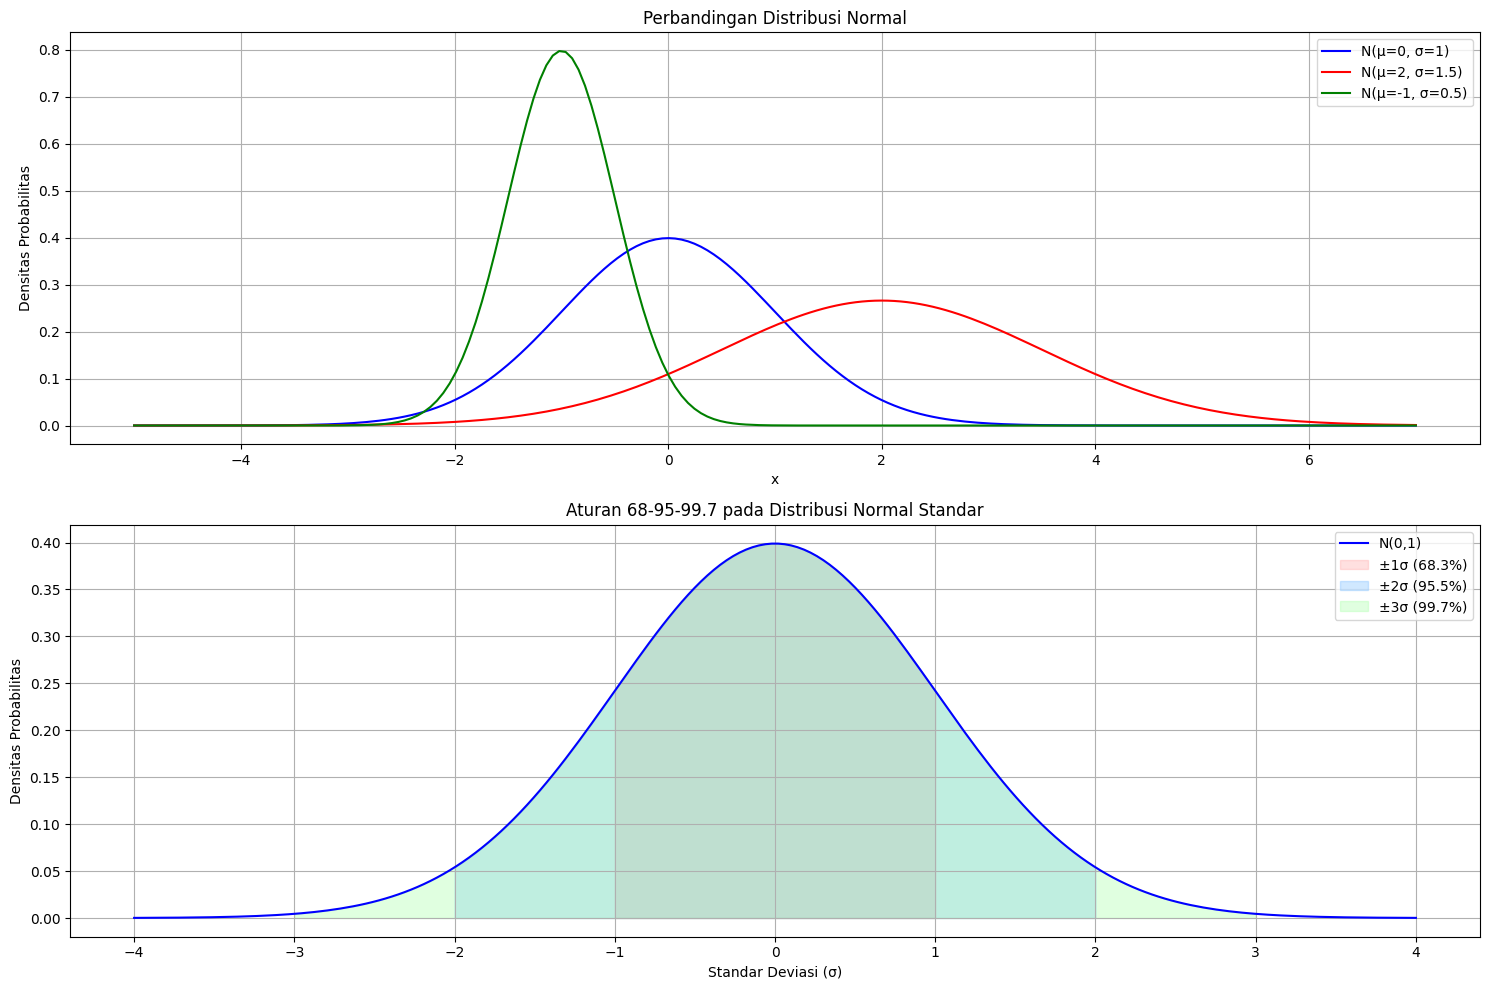

Probabilitas dalam interval standar deviasi:
P(-1σ ≤ X ≤ 1σ) = 0.6827 (68.3%)
P(-2σ ≤ X ≤ 2σ) = 0.9545 (95.4%)
P(-3σ ≤ X ≤ 3σ) = 0.9973 (99.7%)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Parameters for different normal distributions
mu1, sigma1 = 0, 1    # Standard normal
mu2, sigma2 = 2, 1.5  # Shifted and scaled
mu3, sigma3 = -1, 0.5 # Shifted and narrower

# Create points for plotting
x = np.linspace(-5, 7, 200)

# Calculate PDFs
pdf1 = stats.norm.pdf(x, mu1, sigma1)
pdf2 = stats.norm.pdf(x, mu2, sigma2)
pdf3 = stats.norm.pdf(x, mu3, sigma3)

# Plotting
plt.figure(figsize=(15, 10))

# Plot different normal distributions
plt.subplot(211)
plt.plot(x, pdf1, 'b-', label=f'N(μ={mu1}, σ={sigma1})')
plt.plot(x, pdf2, 'r-', label=f'N(μ={mu2}, σ={sigma2})')
plt.plot(x, pdf3, 'g-', label=f'N(μ={mu3}, σ={sigma3})')
plt.title('Perbandingan Distribusi Normal')
plt.xlabel('x')
plt.ylabel('Densitas Probabilitas')
plt.legend()
plt.grid(True)

# Demonstrate the 68-95-99.7 rule
plt.subplot(212)
x_std = np.linspace(-4, 4, 200)
pdf_std = stats.norm.pdf(x_std, 0, 1)

plt.plot(x_std, pdf_std, 'b-', label='N(0,1)')

# Fill areas for different standard deviations
colors = ['#ff9999', '#66b3ff', '#99ff99']
sigmas = [1, 2, 3]
percentages = [0.6827, 0.9545, 0.9973]

for i, (sigma, color, percentage) in enumerate(zip(sigmas, colors, percentages)):
    x_fill = np.linspace(-sigma, sigma, 100)
    plt.fill_between(x_fill, 
                    stats.norm.pdf(x_fill, 0, 1),
                    alpha=0.3,
                    color=color,
                    label=f'±{sigma}σ ({percentage*100:.1f}%)')

plt.title('Aturan 68-95-99.7 pada Distribusi Normal Standar')
plt.xlabel('Standar Deviasi (σ)')
plt.ylabel('Densitas Probabilitas')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print probabilitas untuk setiap interval
print("Probabilitas dalam interval standar deviasi:")
for sigma in [1, 2, 3]:
    prob = stats.norm.cdf(sigma) - stats.norm.cdf(-sigma)
    print(f"P(-{sigma}σ ≤ X ≤ {sigma}σ) = {prob:.4f} ({prob*100:.1f}%)")

## Teorema Limit Pusat (Central Limit Theorem)

Teorema Limit Pusat (CLT) adalah salah satu konsep paling penting dalam statistika. Teorema ini menyatakan bahwa rata-rata dari sampel yang cukup besar akan mendekati distribusi normal, terlepas dari distribusi populasi asalnya.

### Implikasi CLT

1. **Sampling Distribution**
   - Distribusi sampling mean akan mendekati normal
   - Standar error = σ/√n, di mana n adalah ukuran sampel

2. **Aplikasi dalam Machine Learning**
   - Validasi asumsi normalitas
   - Bootstrap sampling
   - Interval kepercayaan

3. **Praktik**
   - Ukuran sampel > 30 biasanya cukup
   - Semakin besar sampel, semakin mendekati normal

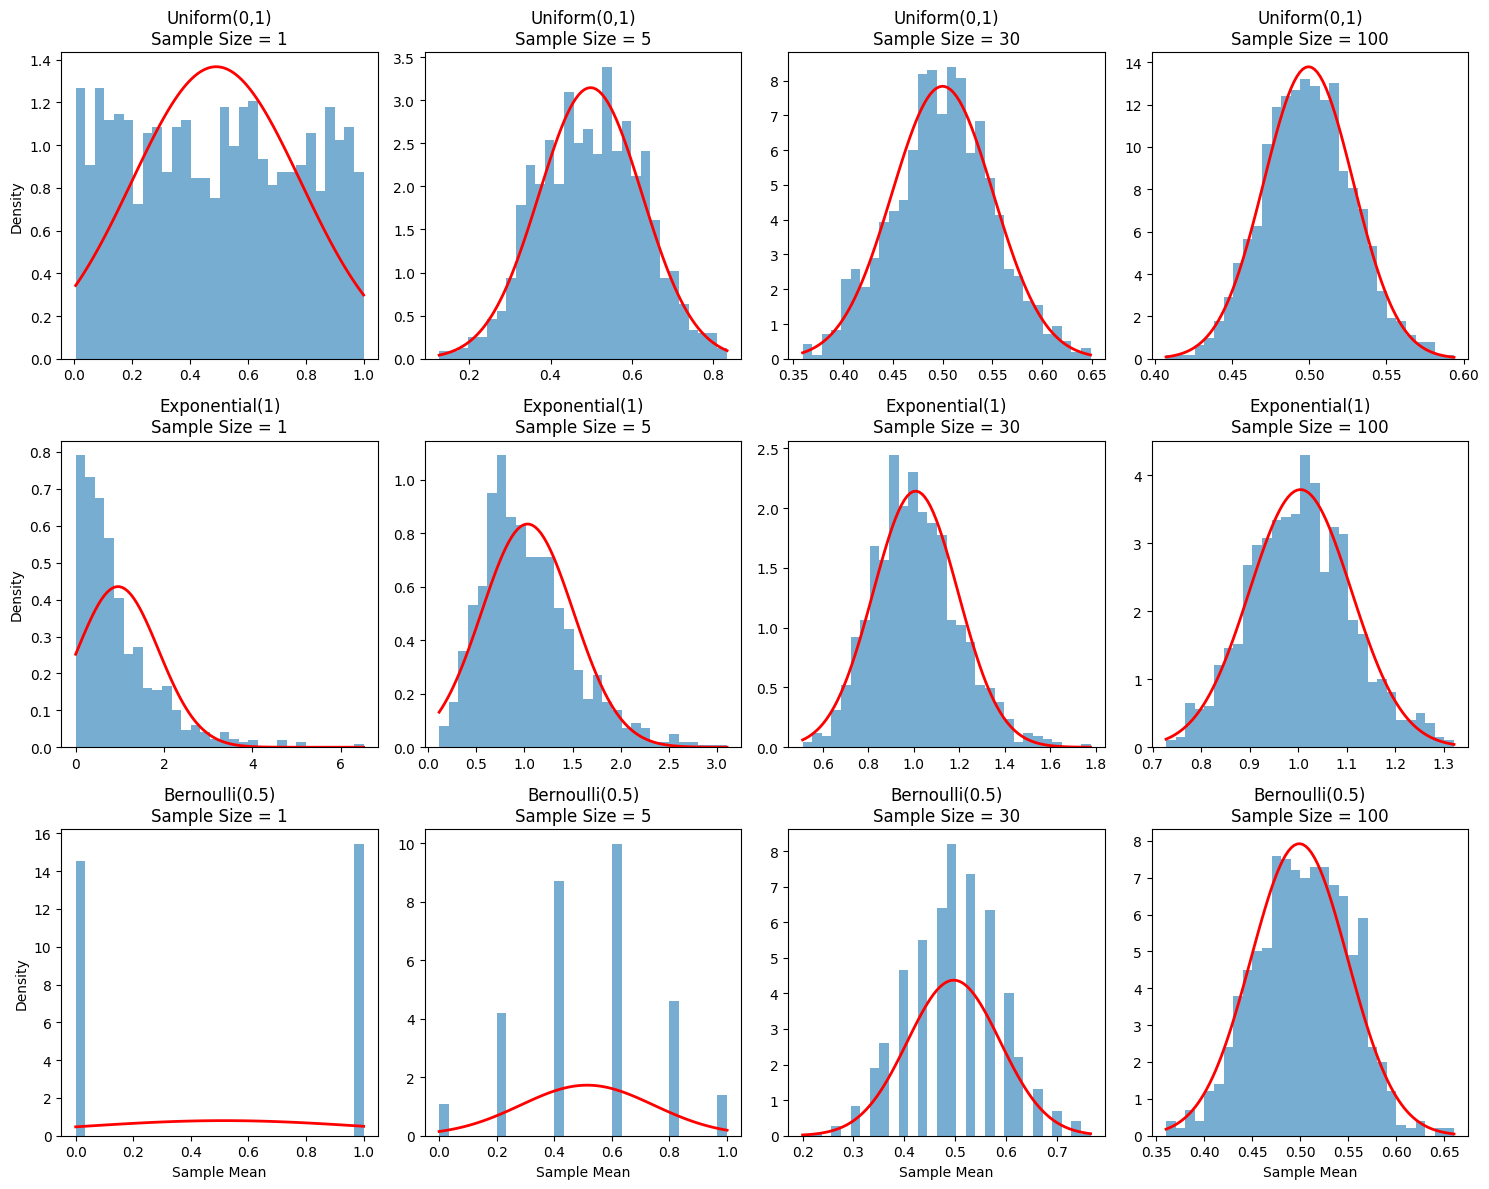

Statistik sampel untuk berbagai ukuran sampel:

Uniform(0,1):
n=  1: mean=0.5035, std=0.2969
n=  5: mean=0.5034, std=0.1300
n= 30: mean=0.4990, std=0.0519
n=100: mean=0.5014, std=0.0293

Exponential(1):
n=  1: mean=1.0077, std=1.0036
n=  5: mean=0.9962, std=0.4319
n= 30: mean=1.0026, std=0.1868
n=100: mean=1.0002, std=0.1013

Bernoulli(0.5):
n=  1: mean=0.5050, std=0.5000
n=  5: mean=0.4938, std=0.2306
n= 30: mean=0.5021, std=0.0926
n=100: mean=0.4998, std=0.0509


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed
np.random.seed(42)

# Function to generate samples and calculate means
def sample_means(distribution, sample_size, n_samples):
    means = []
    for _ in range(n_samples):
        sample = distribution(sample_size)
        means.append(np.mean(sample))
    return means

# Parameters
sample_sizes = [1, 5, 30, 100]
n_samples = 1000

# Create different distributions
def uniform_dist(size):
    return np.random.uniform(0, 1, size)

def exponential_dist(size):
    return np.random.exponential(1, size)

def bernoulli_dist(size):
    return np.random.binomial(1, 0.5, size)

# Plot
plt.figure(figsize=(15, 12))
distributions = [
    (uniform_dist, "Uniform(0,1)"),
    (exponential_dist, "Exponential(1)"),
    (bernoulli_dist, "Bernoulli(0.5)")
]

for idx, (dist, name) in enumerate(distributions):
    for i, size in enumerate(sample_sizes):
        plt.subplot(3, 4, idx*4 + i + 1)
        means = sample_means(dist, size, n_samples)
        
        # Plot histogram
        plt.hist(means, bins=30, density=True, alpha=0.6)
        
        # Plot normal curve
        x = np.linspace(min(means), max(means), 100)
        plt.plot(x, stats.norm.pdf(x, np.mean(means), np.std(means)), 
                'r-', lw=2)
        
        plt.title(f'{name}\nSample Size = {size}')
        if i == 0:
            plt.ylabel('Density')
        if idx == 2:
            plt.xlabel('Sample Mean')

plt.tight_layout()
plt.show()

# Print statistics
print("Statistik sampel untuk berbagai ukuran sampel:")
for dist, name in distributions:
    print(f"\n{name}:")
    for size in sample_sizes:
        means = sample_means(dist, size, n_samples)
        print(f"n={size:3d}: mean={np.mean(means):.4f}, std={np.std(means):.4f}")

## Kesimpulan

Dalam notebook ini, kita telah mempelajari:
1. Jenis-jenis distribusi probabilitas (diskrit dan kontinu)
2. Karakteristik dan sifat distribusi normal
3. Teorema Limit Pusat dan implikasinya
4. Aplikasi distribusi probabilitas dalam machine learning

Konsep-konsep ini sangat penting dalam machine learning untuk:
- Pemodelan data dan asumsi model
- Sampling dan generasi data
- Evaluasi model dan interval kepercayaan
- Preprocessing dan normalisasi data

## Latihan

1. Simulasikan 1000 pelemparan dadu dan plot distribusi frekuensinya. Bandingkan dengan distribusi uniform teoretis.

2. Buktikan Teorema Limit Pusat untuk distribusi seragam dengan:
   - Ukuran sampel = 50
   - Jumlah pengulangan = 10000

3. Hitung probabilitas dalam distribusi normal standar:
   - P(-1 < X < 1)
   - P(X > 2)
   - P(-2 < X < 2)

4. Implementasikan fungsi untuk menghitung interval kepercayaan 95% untuk mean sampel, menggunakan distribusi normal.

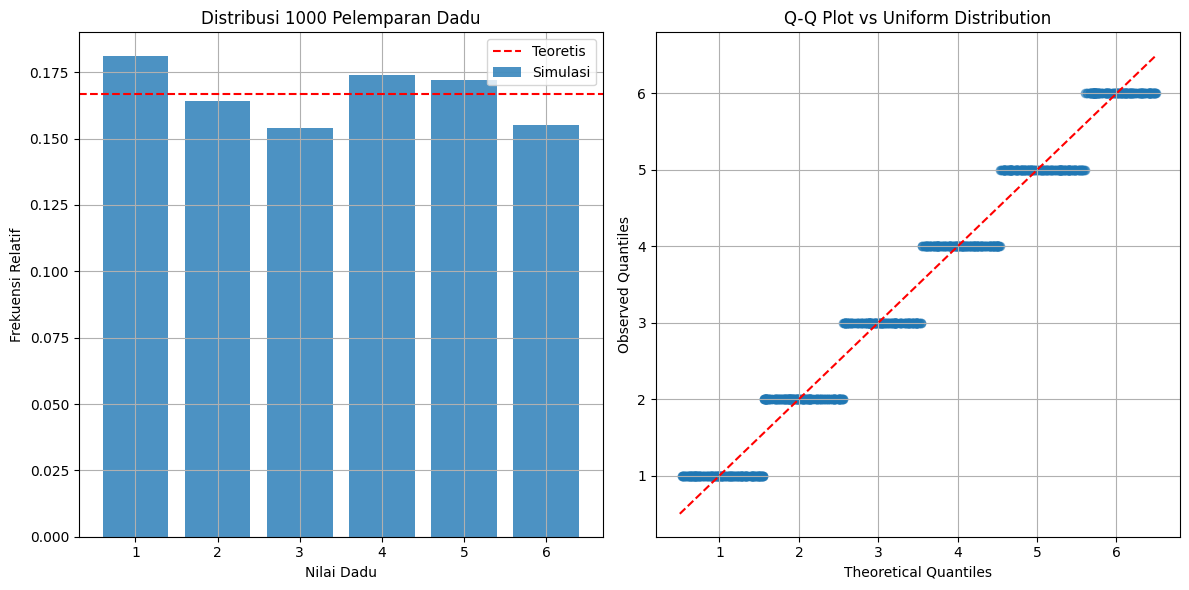

Statistik Simulasi:
Mean: 3.4570 (teoretis: 3.5000)
Std Dev: 1.7135 (teoretis: 1.7078)

Frekuensi Relatif:
Nilai 1: 0.1810 (teoretis: 0.1667)
Nilai 2: 0.1640 (teoretis: 0.1667)
Nilai 3: 0.1540 (teoretis: 0.1667)
Nilai 4: 0.1740 (teoretis: 0.1667)
Nilai 5: 0.1720 (teoretis: 0.1667)
Nilai 6: 0.1550 (teoretis: 0.1667)

Uji Chi-square untuk keseragaman:
Statistik Chi-square: 3.5480
P-value: 0.6161
Kesimpulan: Distribusi seragam pada tingkat signifikansi 5%


In [10]:
# Solusi Latihan 1: Simulasi Pelemparan Dadu

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed
np.random.seed(42)

# Simulasi 1000 pelemparan dadu
n_rolls = 1000
rolls = np.random.randint(1, 7, size=n_rolls)

# Hitung frekuensi
values, counts = np.unique(rolls, return_counts=True)
frequencies = counts / n_rolls

# Plot hasil
plt.figure(figsize=(12, 6))

# Histogram hasil simulasi
plt.subplot(121)
plt.bar(values, frequencies, alpha=0.8, label='Simulasi')
plt.axhline(y=1/6, color='r', linestyle='--', label='Teoretis')
plt.title(f'Distribusi {n_rolls} Pelemparan Dadu')
plt.xlabel('Nilai Dadu')
plt.ylabel('Frekuensi Relatif')
plt.legend()
plt.grid(True)

# Q-Q plot untuk membandingkan dengan distribusi uniform
plt.subplot(122)
theoretical_quantiles = np.quantile(np.random.uniform(0.5, 6.5, n_rolls), 
                                  np.linspace(0, 1, n_rolls))
observed_quantiles = np.sort(rolls)
plt.scatter(theoretical_quantiles, observed_quantiles, alpha=0.5)
plt.plot([0.5, 6.5], [0.5, 6.5], 'r--')
plt.title('Q-Q Plot vs Uniform Distribution')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Observed Quantiles')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print statistik
print("Statistik Simulasi:")
print(f"Mean: {np.mean(rolls):.4f} (teoretis: 3.5000)")
print(f"Std Dev: {np.std(rolls):.4f} (teoretis: {np.sqrt(35/12):.4f})")
print("\nFrekuensi Relatif:")
for value, freq in zip(values, frequencies):
    print(f"Nilai {value}: {freq:.4f} (teoretis: 0.1667)")

# Uji chi-square untuk keseragaman
chi2_stat, p_value = stats.chisquare(counts)
print(f"\nUji Chi-square untuk keseragaman:")
print(f"Statistik Chi-square: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print("Kesimpulan: Distribusi " + 
      ("seragam" if p_value > 0.05 else "tidak seragam") +
      " pada tingkat signifikansi 5%")